In [20]:
# Load Pandas library
import pandas as pd

#Load numpy library
import numpy as np

#import MatPlotLib
import matplotlib as mpl 

#Import PyPlot in MatPlotLib
import matplotlib.pyplot as plt 

#Import SciKitLearn decomposition PCA library
from sklearn.decomposition import PCA

#Import SciKitLearn dataset 
from sklearn import datasets as ds

#LinearRegression 
from sklearn.linear_model import LinearRegression

#Allows for meterics to be found after Logistic Regression
from sklearn import metrics as mt

#Create KFolds for CV_Object
from sklearn.model_selection import StratifiedKFold

#Creates Standard Scaler Variables
from sklearn.preprocessing import StandardScaler

#Support Vector Machine
from sklearn.svm import SVC

#Seaborn 
import seaborn as sb

#Magics for inline code.
%matplotlib inline

#Create Zillow Data Frame using Read_CSV
# read in the csv file
dfAttributeData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/Properties_2016.csv') 

dfTrainingData = pd.read_csv('/users/cmirwin/desktop/Smu Data Sets/Data Mining/ZillowData/train_2016.csv')
#dfTrainingData = pd.read_csv('/Users/joshuaklein/Desktop/train_2016_v2.csv')

#Create new data set that contains both the data zillow and the data to train against
dfZillowData = pd.merge(dfTrainingData, dfAttributeData, on='parcelid', how='left')

#Remove 2.9 million records from memory
del dfAttributeData


#Get the headers to ensure all columns are included.
dfZillowData.head(10)

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13
5,11509835,-0.2705,2016-01-02,1.0,NaN,NaN,4.0,4.0,NaN,1.0,...,NaN,NaN,880650.0,2447951.0,2015.0,1567301.0,27126.57,NaN,NaN,6.037621e+13
6,12286022,0.0440,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,7.0,...,NaN,NaN,64549.0,111521.0,2015.0,46972.0,2304.97,NaN,NaN,6.037542e+13
7,17177301,0.1638,2016-01-02,NaN,NaN,NaN,2.5,3.0,NaN,NaN,...,2.0,NaN,107000.0,306000.0,2015.0,199000.0,3745.50,NaN,NaN,6.111003e+13
8,14739064,-0.0030,2016-01-02,NaN,NaN,NaN,1.0,2.0,NaN,NaN,...,NaN,NaN,66834.0,210064.0,2015.0,143230.0,2172.88,NaN,NaN,6.059042e+13
9,14677559,0.0843,2016-01-03,NaN,NaN,NaN,2.0,2.0,NaN,NaN,...,1.0,NaN,109977.0,190960.0,2015.0,80983.0,1940.26,NaN,NaN,6.059063e+13


In [21]:
#We can see that a number of the data columns have NaN values that were assigned during import
#we choose to replace those values with the median values for the variable.

#Create new columns with highest missing values as True/False.
#print(dfMajorityOfDataMissing)

dfZillowData['hasbasement'] = dfZillowData[['basementsqft']].where(dfZillowData[['basementsqft']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasdeck'] = dfZillowData[['yardbuildingsqft26']].where(dfZillowData[['yardbuildingsqft26']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hasfireplace'] = dfZillowData[['fireplaceflag']].where(dfZillowData[['fireplaceflag']].isnull(), 1).fillna(0).astype(int)

dfZillowData['hashottuborspa'] = dfZillowData[['hashottuborspa', 'pooltypeid2']].where(dfZillowData[['hashottuborspa','pooltypeid2']].isnull(), 1).fillna(0).astype(int)

dfZillowData['haspatio'] = dfZillowData[['yardbuildingsqft17']].where(dfZillowData[['yardbuildingsqft17']].isnull(), 1).fillna(0).astype(int)

#Create Function for County Rename
def rename(row):
    if row['regionidcounty'] == 1286:
        val = 'Ventura County'
    elif row['regionidcounty'] == 3101:
        val = 'Los Angeles County'
    else:
        val = 'Orange County'
    return val

dfZillowData['countyname'] = dfZillowData.apply(rename, axis=1)

#Need to transform Tax Value because of large outliers
dfZillowData['log10TaxValue'] = np.log10(dfZillowData['taxvaluedollarcnt'])

#Create New data frame for everything
dfForModel = dfZillowData.replace(to_replace='NaN',value= np.nan)

#Get median values for based on original values
dfMedians = pd.DataFrame(dfZillowData.median())

#Add Column Name to Medians DataFrame
dfMedians.columns = ['medianvalue']

#Create custom updates
dfColumns = pd.DataFrame(pd.Series([1.,0.,0.
                                    ,0.,0.
                                    ,0.,0.,0.
                                    ,13.,5.,0.
                                    ,24.,0.,0.
                                    ,0.,0.,0.
                                    ,0.]
              , index=['numberofstories', 'bathroomcnt','bedroomcnt'
                      ,'fireplacecnt','fullbathcnt'
                      , 'poolcnt', 'roomcnt','unitcnt'
                      , 'heatingorsystemtypeid','airconditioningtypeid', 'garagetotalsqft'
                      , 'storytypeid', 'basementsqft', 'finishedsquarefeet13'
                      , 'finishedsquarefeet6','finishedsquarefeet15','finishedsquarefeet50'
                      , 'finishedfloor1squarefeet']))
#Second Row #,0.#,'garagecarcnt'
#Set Column Name
dfColumns.columns = ['updatevalue']

#Create Merged Data set with values of both medians and custom
dfMerged = pd.concat([dfMedians, dfColumns], axis=1, join_axes=[dfMedians.index])

#Create new column of data that is custom values filled with median for any null
dfMerged['values'] = dfMerged['updatevalue'].fillna(dfMerged['medianvalue'])

#Apply median values to the overall data set
dfForModel = dfForModel.fillna(dfMerged['values'])

#Create dummy variables for all TypeId columns
#This section takes a long time due to the fact that we are creating 
#so many additional variables by 3 million records. 

#heatingorsystemtypeid
#Create dynamic Name
dummies = pd.get_dummies(dfForModel['heatingorsystemtypeid']).rename(columns=lambda x: 'HSTypeId_' + str(x))
#Join to Dataframe for Model
dfForModel = pd.concat([dfForModel, dummies], axis=1)

#Repeat of code above
#airconditioningtypeid
dummies = pd.get_dummies(dfForModel['airconditioningtypeid']).rename(columns=lambda x: 'ACTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['airconditioningtypeid'], inplace=True, axis=1)

#architecturalstyletypeid
dummies = pd.get_dummies(dfForModel['architecturalstyletypeid']).rename(columns=lambda x: 'ArchStyleTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['architecturalstyletypeid'], inplace=True, axis=1)

#decktypeid
dummies = pd.get_dummies(dfForModel['decktypeid']).rename(columns=lambda x: 'DeckTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['decktypeid'], inplace=True, axis=1)

#buildingclasstypeid
dummies = pd.get_dummies(dfForModel['buildingclasstypeid']).rename(columns=lambda x: 'BuildClassTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingclasstypeid'], inplace=True, axis=1)

#typeconstructiontypeid
dummies = pd.get_dummies(dfForModel['typeconstructiontypeid']).rename(columns=lambda x: 'ConstructionTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['typeconstructiontypeid'], inplace=True, axis=1)

#buildingqualitytypeid
dummies = pd.get_dummies(dfForModel['buildingqualitytypeid']).rename(columns=lambda x: 'BuildingQualTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['buildingqualitytypeid'], inplace=True, axis=1)

#propertylandusetypeid
dummies = pd.get_dummies(dfForModel['propertylandusetypeid']).rename(columns=lambda x: 'LandUseTypeId_' + str(x))
dfForModel = pd.concat([dfForModel, dummies], axis=1)
#dfForModel.drop(['propertylandusetypeid'], inplace=True, axis=1)

#Create Function for County Rename
def garagecnt(row):
    if row['garagecarcnt'] > 0:
        val = 1
    else:
        val = 0
    return val

dfForModel['hasgarage'] = dfForModel.apply(garagecnt, axis=1)

#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfForModel)

#Create Numeric Only Dataframe
dfZillowDataNumeric = dfDataTypes.select_dtypes(['float64','int64'])

dfZillowDataNumeric.head(10)

,parcelid,logerror,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,LandUseTypeId_260.0,LandUseTypeId_261.0,LandUseTypeId_263.0,LandUseTypeId_264.0,LandUseTypeId_265.0,LandUseTypeId_266.0,LandUseTypeId_267.0,LandUseTypeId_269.0,LandUseTypeId_275.0,hasgarage
0,11016594,0.0276,1.0,7.0,0.0,2.0,3.0,4.0,4.0,2.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,14366692,-0.1684,5.0,7.0,0.0,3.5,4.0,4.0,7.0,3.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,12098116,-0.0040,1.0,7.0,0.0,3.0,2.0,4.0,4.0,3.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,12643413,0.0218,1.0,7.0,0.0,2.0,2.0,4.0,4.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,14432541,-0.0050,5.0,7.0,0.0,2.5,4.0,4.0,7.0,2.5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
5,11509835,-0.2705,1.0,7.0,0.0,4.0,4.0,4.0,1.0,4.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
6,12286022,0.0440,5.0,7.0,0.0,1.0,2.0,4.0,7.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
7,17177301,0.1638,5.0,7.0,0.0,2.5,3.0,4.0,7.0,2.5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
8,14739064,-0.0030,5.0,7.0,0.0,1.0,2.0,4.0,7.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
9,14677559,0.0843,5.0,7.0,0.0,2.0,2.0,4.0,7.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1


## Create accuracy and plot functions, Helps show cross validated results. 

In [22]:
def plot_class_acc(ytrue,yhat, title=''):
    acc_list = per_class_accuracy(ytrue,yhat)
    plt.bar(range(len(acc_list)), acc_list)
    plt.xlabel('Number of Garages')
    plt.ylabel('Accuracy within class')
    plt.title(title+", Total Acc=%.1f"%(100*mt.accuracy_score(ytrue,yhat)))
    plt.grid()
    plt.ylim([0,1])
    plt.show()

def per_class_accuracy(ytrue,yhat):
    conf = mt.confusion_matrix(ytrue,yhat)
    norm_conf = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
    return np.diag(norm_conf)

## Create DataFrame and Cross Validation Object

In [23]:
#Create data set that has all original values from the file.
#Every Zillow value with a real garage car count
dfTrainValues = dfZillowData[['parcelid']][~(dfZillowData['garagecarcnt'].isnull())]

#Get values for dfForModel 
dfTrainValues = pd.merge(dfTrainValues, dfForModel, on='parcelid', how='left')

#Create Numeric Dataframe only for PCA and Classification.
#Find out what data types are in the Data set
dfDataTypes = pd.DataFrame(dfTrainValues)

#Create Numeric Only Dataframe
dfTrainValuesNumeric = dfDataTypes.select_dtypes(['float64','int64'])

#Create Cross Validation object and Test and train values
# we want to predict if a house has a garage
if 'garagecarcnt' in dfTrainValuesNumeric:
    
    #Get the values for each property
    garageActualValues = dfTrainValuesNumeric['garagecarcnt'].values 
    
    #delete any variables that give the model the possible anwser
    del dfTrainValuesNumeric['garagecarcnt']
    del dfTrainValuesNumeric['garagetotalsqft']

    # Gather all values to use for prediction
    garageAdditionalVars = dfTrainValuesNumeric.values   

#Number of iterations
num_cv_iterations = 5
#Create Cross Validation objects using folds
cv_object = StratifiedKFold(n_splits=num_cv_iterations, random_state=None, shuffle=True)

print('Cross Validation Object is created')


Cross Validation Object is created


## Why we choose the Garage Car Count. 

F_onewayResult(statistic=4.1511060844724872, pvalue=0.029541449942388377)

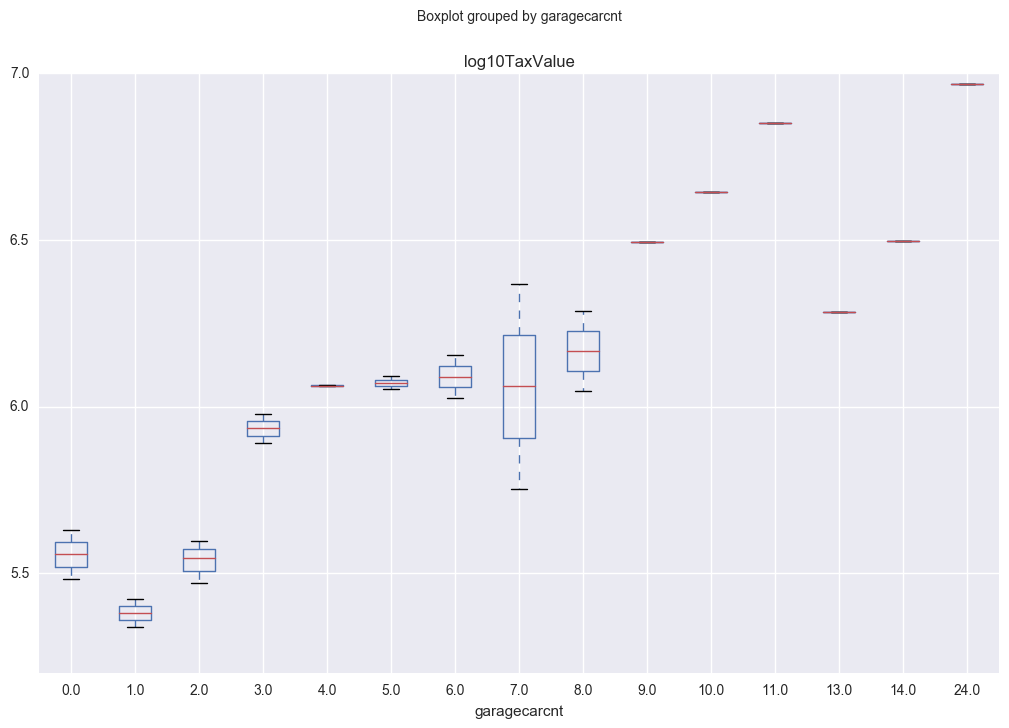

In [24]:
avgValuebyBath = dfForModel.groupby(['countyname', 'garagecarcnt'], as_index = False)['log10TaxValue'].mean()

#print(avgValuebyBath)

LAGargageValue = avgValuebyBath[avgValuebyBath['countyname'] == 'Los Angeles County']
OCGargageValue = avgValuebyBath[avgValuebyBath['countyname'] == 'Orange County']
VentGargageValue = avgValuebyBath[avgValuebyBath['countyname'] == 'Ventura County'] 

#We see that the average value of homes without a garage is lower than ones with it. 

avgValuebyBath.boxplot('log10TaxValue', by='garagecarcnt', figsize=(12, 8))

import scipy.stats as stats

#print(avgValuebyBath[avgValuebyBath['countyname'] == 'Orange County'])
garageCntZero = []
garageCntGTZero = []

garageCntZero.append(OCGargageValue['log10TaxValue'][OCGargageValue['garagecarcnt'] ==0].mean())

garageCntGTZero.append(OCGargageValue['log10TaxValue'][OCGargageValue['garagecarcnt'] > 0].mean())

#print(garageCntZero)
stats.f_oneway(LAGargageValue['log10TaxValue'], OCGargageValue['log10TaxValue'], VentGargageValue['log10TaxValue'])


## Random Forest Classification

('Pipeline accuracy', 0.86970716593930109)


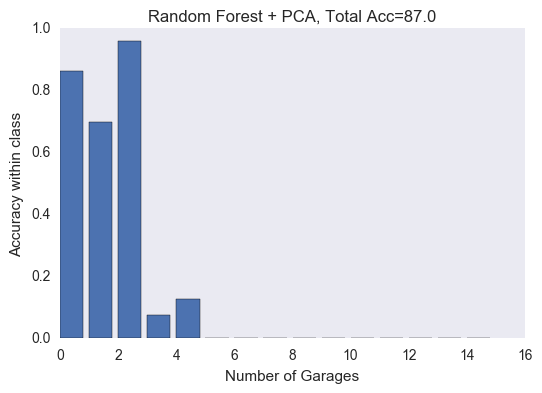

In [25]:
  
# we will fill this with predictions
yhat = np.zeros(garageActualValues.shape) 

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# scale attributes by the training set
stdsclrObjForGarage = StandardScaler()

# find scalings for each column that make this zero mean and unit std
# We use the training data to help fit the standard dev
# find scalings for each column that make this zero mean and unit std
stdsclrObjForGarage.fit(dfTrainValuesNumeric) 

RFC_pipe = Pipeline(
    [('PCAForRFC',PCA(n_components=50, svd_solver='randomized')),
     ('RFC',RandomForestClassifier(max_depth=50, n_estimators=150, n_jobs=-1))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv_object.split(garageAdditionalVars,garageActualValues):

    #Run the pipeline 
    RFC_pipe.fit(garageAdditionalVars[train],garageActualValues[train])
    
    #Get the results of the Test set
    yhat[test] = RFC_pipe.predict(garageAdditionalVars[test])
     
total_accuracy = mt.accuracy_score(garageActualValues, yhat)
print ('Pipeline accuracy', total_accuracy)
plot_class_acc(garageActualValues,yhat,title="Random Forest + PCA")

## KNearest Neighbors Classifier

('KNN, pipeline accuracy', 0.81733684245594163)


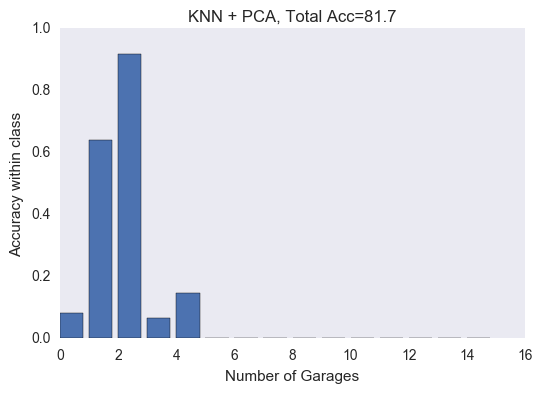

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# we will fill this with predictions
yhat = np.zeros(garageActualValues.shape) 

# setup pipeline to take PCA, then fit a KNN classifier
KNN_pipe = Pipeline(
    [('PCAForKNN',PCA(n_components=100,svd_solver='randomized')),
     ('KNN',KNeighborsClassifier(n_neighbors=5))]
)

# now iterate through and get predictions, saved to the correct row in yhat
for train, test in cv_object.split(garageAdditionalVars,garageActualValues):

    #Run the pipeline 
    KNN_pipe.fit(garageAdditionalVars[train],garageActualValues[train])
    
    #Get the results of the Test set
    yhat[test] = KNN_pipe.predict(garageAdditionalVars[test])

total_accuracy = mt.accuracy_score(garageActualValues, yhat)
print ('KNN, pipeline accuracy', total_accuracy)
plot_class_acc(garageActualValues,yhat,title="KNN + PCA")

## Support Vector Machine (SVM) Classifier

In [117]:
#Create X and Y Train and Test Groups. 

for train_index, test_index in cv_object.split(garageAdditionalVars,garageActualValues):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = garageAdditionalVars[train_index], garageAdditionalVars[test_index]
    y_train, y_test = garageActualValues[train_index], garageActualValues[test_index]
    
print 'Test and Train Data Created'

#This section scales the data in order to create a more useable data set
# scale attributes by the training set
stdsclrObj = StandardScaler()

# find scalings for each column that make this zero mean and unit std
#We use the training data to help fit the standard dev
stdsclrObj.fit(X_train) # find scalings for each column that make this zero mean and unit std

# to transform new feature data
# apply to training
X_train_scaled = stdsclrObj.transform(X_train)

# apply those means and std to the test set (without snooping at the test set values)
X_test_scaled = stdsclrObj.transform(X_test) 

print 'Scaled Data created'

#Run Support Vector Machine
from matplotlib import pyplot as svmplt
%matplotlib inline
# lets investigate SVMs on the data and play with the parameters and kernels
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
# train the model just as before
#more info on Support Vector Machines is at the website below.
#https://www.analyticsvidhya.com/blog/2015/10/understaing-support-vector-machine-example-code/


#change between the Kernal test ‘rbf’, ‘poly’, 'linear', ‘sigmoid’
#only linear will produce a graph below. 
kernelTest = 'linear'

#gamma: Kernel coefficient for . Higher the value of gamma
#will try to exact fit the as per training data set i.e. generalization error and cause over-fitting problem.
#gammaLevel needs to be a float can also be auto
#altering this from Auto will create much longer run times.
gammaLevel = 'auto'

#C is the cost variable 
#Penalty parameter C of the error term. 
#It also controls the trade off between smooth decision boundary and classifying the training points correctly.
cost = 0.05
#supportVectorCLF = SVC(C=cost, kernel=kernelTest, gamma = gammaLevel) # get object
supportVectorCLF = LinearSVC(C=cost, penalty = 'l2')
supportVectorCLF.fit(X_train_scaled, y_train)  # train object

y_hat = supportVectorCLF.predict(X_test_scaled) # get test set precitions

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print('accuracy:', acc )
print(conf)

Test and Train Data Created
Scaled Data created
('accuracy:', 0.82169638393601063)
[[  58    0    0    0    0    0    0    0    0    0    0    0]
 [   0  707  632    0    0    0    0    0    0    0    0    0]
 [   0  229 4159    8    4    0    0    0    0    0    0    0]
 [   0    0  127    6    0    0    0    0    0    0    0    0]
 [   0    4   45    2    1    0    0    0    0    0    0    0]
 [   0    0    8    0    2    0    0    0    0    0    0    0]
 [   0    1    1    1    0    0    0    0    0    0    0    0]
 [   0    0    0    1    1    0    0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0]
 [   0    1    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0    0]
 [   0    0    0    1    0    0    0    0    0    0    0    0]]


## Get Vector Values

('index value of ', 0, 'Variable Name: ', 'yearbuilt', 'has weight of', -0.27744974571362163)
('index value of ', 1, 'Variable Name: ', 'calculatedfinishedsquarefeet', 'has weight of', -0.24737686080454888)
('index value of ', 2, 'Variable Name: ', 'lotsizesquarefeet', 'has weight of', -0.21789569822274985)
('index value of ', 3, 'Variable Name: ', 'roomcnt', 'has weight of', -0.19452614258253256)
('index value of ', 4, 'Variable Name: ', 'calculatedbathnbr', 'has weight of', -0.18004439315012352)
('index value of ', 5, 'Variable Name: ', 'bathroomcnt', 'has weight of', -0.14918546930706403)
('index value of ', 6, 'Variable Name: ', 'finishedsquarefeet50', 'has weight of', -0.14036055692557436)
('index value of ', 7, 'Variable Name: ', 'fireplacecnt', 'has weight of', -0.10700485444063071)
('index value of ', 8, 'Variable Name: ', 'latitude', 'has weight of', -0.10348611089120698)
('index value of ', 9, 'Variable Name: ', 'log10TaxValue', 'has weight of', -0.084078324583652664)
('index

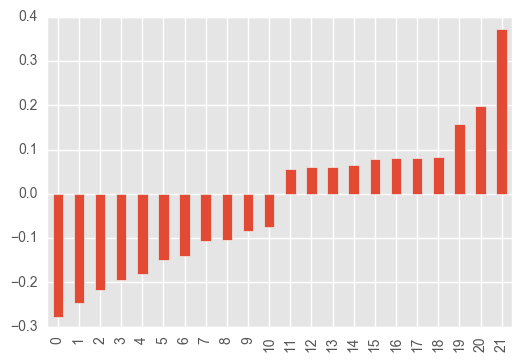

In [123]:
coefValues = zip(np.array(supportVectorCLF.coef_[1].T[np.newaxis]).T, dfTrainValuesNumeric)

    # sort these attributes and spit them out
coefValues = pd.DataFrame(sorted(coefValues))
    
    #keep all columns from dataframe with absolute values of .05 
dfValuesGTfive = coefValues.loc[abs(coefValues[0]) > .05]

    #Reset Index from removing data
dfValuesGTfive = dfValuesGTfive.reset_index(drop=True)

    #Remove any duplicate values from multiple runs
dfValuesGTfive = dfValuesGTfive.drop_duplicates([1], keep='last')

    # iterate over the Variable values
    #Get weight values
weights = dfValuesGTfive[0] 
    #Get Variable Names
variable_names = dfValuesGTfive[1]
    #Get Index count
indexes = dfValuesGTfive.index
    #Combined the data set and then print out results
for index, weight, name in zip(indexes, weights,variable_names):
    print('index value of ', index , 'Variable Name: ', name, 'has weight of', weight[0])

    #Due to the large number of variables we choose an absolute value of .15 as a cut off
    #Show all variables with an absolute value of greater than .15
plt.style.use('ggplot')
    #The commented line below give the correct labels, but not the correct values.
    #plotweights = pd.Series(dfValuesGTfive[0].astype(float), index=variable_names)
SVMweights = pd.Series(dfValuesGTfive[0].astype(float))
SVMweights.plot(kind='bar')
plt.show()


# Section 2
## Run PCA 

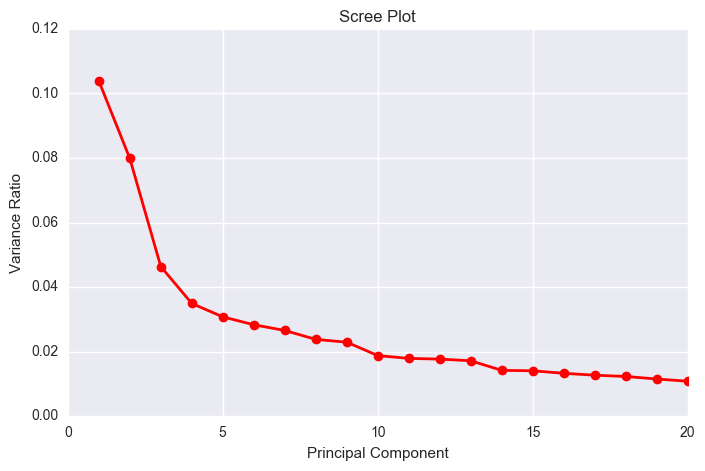

In [31]:
ZillowDataPCA = dfZillowDataNumeric

#This section scales the data in order to create a more useable data set
# scale attributes by the training set
stdsclrObj = StandardScaler()

# find scalings for each column that make this zero mean and unit std
#We use the training data to help fit the standard dev
# find scalings for each column that make this zero mean and unit std
stdsclrObj.fit(ZillowDataPCA) 

# to transform new feature data
# apply to training
ZillowData_scaled = stdsclrObj.transform(ZillowDataPCA)

components = 20

pca = PCA(n_components= components)

#Run PCA
ZillowDataPCA_pca = pca.fit(ZillowData_scaled).transform(ZillowData_scaled) # fit data and then transform it

variance_ratio = pca.explained_variance_ratio_

fig = plt.figure(figsize=(8,5))
#Create 
CompentValues = np.arange(components) + 1
plt.plot(CompentValues, variance_ratio, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Ratio')
plt.show()

In [36]:
#Create Cross Validation object and Test and train values
# we want to predict if a house has a garage
if 'log10TaxValue' in dfZillowDataNumeric:
    
    #Get the values for each property
    actualValues = dfZillowDataNumeric['log10TaxValue'].values 
    
    print('deleted')
    # get rid of the hasgarage variable
    del dfZillowDataNumeric['log10TaxValue'] 

    # Gather all values to use for prediction
    additionalVars = dfZillowDataNumeric.values  


#Create X and Y Train and Test Groups. 
for train_index, test_index in cv_object.split(additionalVars,actualValues):
    #Full dataset
    X_train = additionalVars[train_index]
    X_test = additionalVars[test_index]
    
    #Target Values
    y_train = actualValues[train_index]
    y_test = actualValues[test_index]
    
print 'Test and Train Data Created'


Test and Train Data Created


('Training Data R2 value:', 0.58953150595130988)


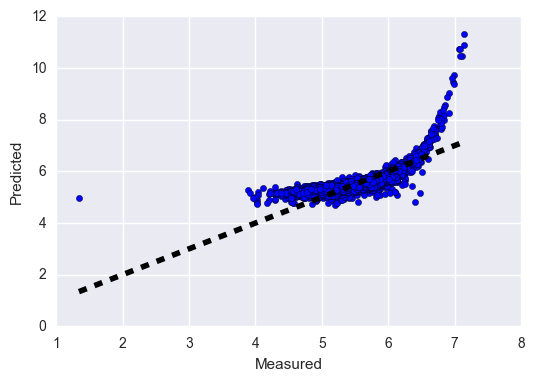

In [37]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import r2_score

#Create Linear Regression Object
linearReg = LinearRegression()

# train object
linearReg.fit(X_train,y_train)  

# get test set precitions
y_hat = linearReg.predict(X_test)

r2TrainScore = linearReg.score(X_train,y_train)
print('Training Data R2 value:', r2TrainScore)

#Find prediction values
predictedAcc = cross_val_predict(linearReg, X_test, y_test, cv = cv_object)

#Create a graph showing the results of the linear regression
fig, ax = plt.subplots()
ax.scatter(y_test, predictedAcc)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()


## Lasso Regression

/Users/cmirwin/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


('R2 on test data', 0.56693973075479709)


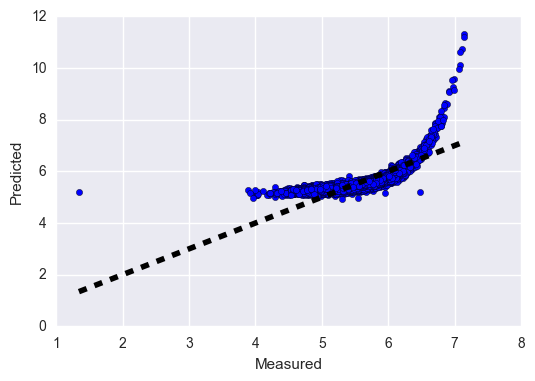

In [38]:
from sklearn.linear_model import Lasso

alpha = 0.05
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
predictedValuesLasso = lasso.predict(X_test)

r2_score_lasso = r2_score(y_test, predictedValuesLasso)

print("R2 on test data",r2_score_lasso)

#Create a graph showing the results of the Lasso Regression
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValuesLasso)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Elastic Net Regression

('R2 on test data', 0.57780554427428565)


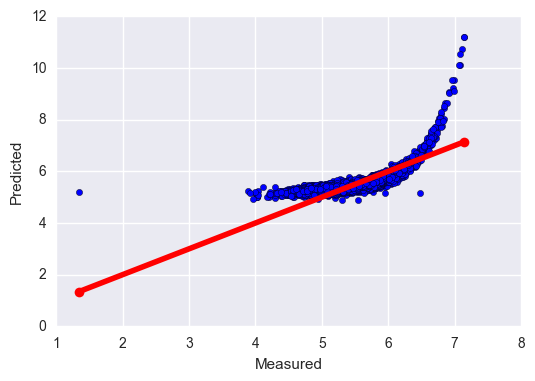

In [39]:
from sklearn.linear_model import ElasticNet

ENetReg = ElasticNet(alpha=alpha, l1_ratio=0.10)

ENetReg.fit(X_train, y_train)

predictedValuesElasticNet = ENetReg.predict(X_test)

r2_score_enet = r2_score(y_test, predictedValuesElasticNet)

print("R2 on test data", r2_score_enet)

#Create a graph showing the results of the linear regression
fig, ax = plt.subplots()
ax.scatter(y_test, predictedValuesElasticNet)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '-ro', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()



## Plot of Linear vs Lasso vs Elastic

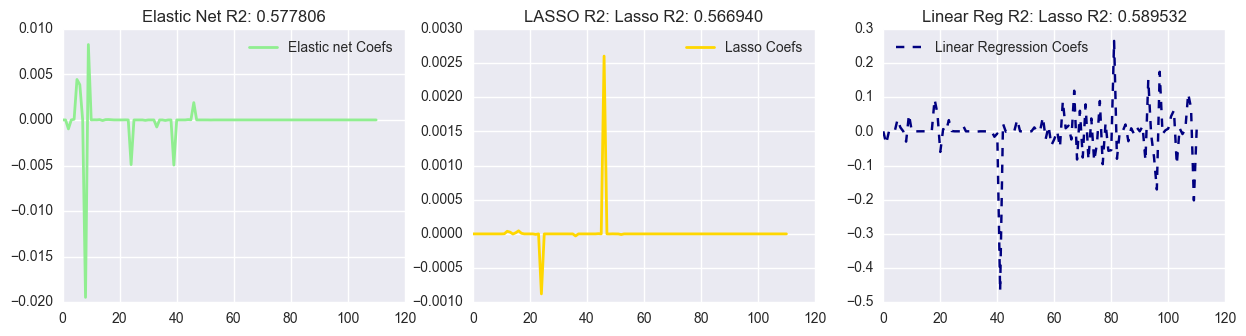

In [40]:
f, ax = plt.subplots(figsize=(15, 12))

f.title = plt.title("Linear Reg R2: Lasso R2: %f, Elastic Net R2: %f"
          % (r2_score_lasso, r2_score_enet))

plt.subplot(3,3,1)
plt.plot(ENetReg.coef_, color='lightgreen', linewidth=2,label='Elastic net Coefs')
plt.legend(loc='best')
plt.title("Elastic Net R2: %f"% (r2_score_enet))

plt.subplot(3,3,2)
plt.plot(lasso.coef_, color='gold', linewidth=2,label='Lasso Coefs')
plt.legend(loc='best')
plt.title("LASSO R2: Lasso R2: %f"% (r2_score_lasso))

plt.subplot(3,3,3)
plt.plot(linearReg.coef_, '--', color='navy', label='Linear Regression Coefs')
plt.legend(loc='best')
plt.title("Linear Reg R2: Lasso R2: %f"% (r2TrainScore))